<a href="https://colab.research.google.com/github/jayac251/python_learning/blob/main/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# mounting google drive
from google.colab import drive
drive.mount("/gdrive")
import pandas as pd
import numpy as np

#importing dataset
complete_data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/GRANULES_NS _15_20_5Y.csv")
complete_data.tail()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
1209,12/23/2020,367.149994,369.950012,364.549988,366.450012,364.451996,978498
1210,12/24/2020,368.000000,375.899994,364.000000,372.799988,370.767365,1548124
1211,12/28/2020,374.649994,375.899994,369.049988,372.600006,370.568451,846168
1212,12/29/2020,365.000000,379.399994,365.000000,370.649994,368.629059,1738585
1213,12/30/2020,370.899994,370.899994,361.299988,363.350006,361.368866,928292


In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14,14))
plt.plot(complete_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [68]:
from sklearn.preprocessing import MinMaxScaler

train_set = complete_data.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
len(train_set)
print(training_set_scaled)
print(len(training_set_scaled))

X_train = []
y_train = []

for i in range(60, 1214):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



[[0.02723943]
 [0.02959154]
 [0.02957746]
 ...
 [0.84971829]
 [0.82253521]
 [0.83915491]]
1214


In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [70]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
37/37 [==============================] - 11s 121ms/step - loss: 0.0125
Epoch 2/15
37/37 [==============================] - 5s 125ms/step - loss: 0.0068
Epoch 3/15
37/37 [==============================] - 5s 123ms/step - loss: 0.0070
Epoch 4/15
37/37 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 5/15
37/37 [==============================] - 5s 123ms/step - loss: 0.0038
Epoch 6/15
37/37 [==============================] - 4s 121ms/step - loss: 0.0037
Epoch 7/15
37/37 [==============================] - 4s 121ms/step - loss: 0.0032
Epoch 8/15
37/37 [==============================] - 5s 123ms/step - loss: 0.0036
Epoch 9/15
37/37 [==============================] - 5s 123ms/step - loss: 0.0025
Epoch 10/15
37/37 [==============================] - 5s 123ms/step - loss: 0.0029
Epoch 11/15
37/37 [==============================] - 5s 123ms/step - loss: 0.0026
Epoch 12/15
37/37 [==============================] - 5s 122ms/step - loss: 0.0061
Epoch 13/15
37/37 [=====

In [71]:
#importing test dataset
test_data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/GRANULES.NS_Jan21_Jun21.csv")
test_data.tail()

print(len(test_data))

real_stock_price = test_data.iloc[:, 1:2].values

real_stock_price

dataset_total = pd.concat((complete_data['Open'], test_data['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 121):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


121


In [72]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

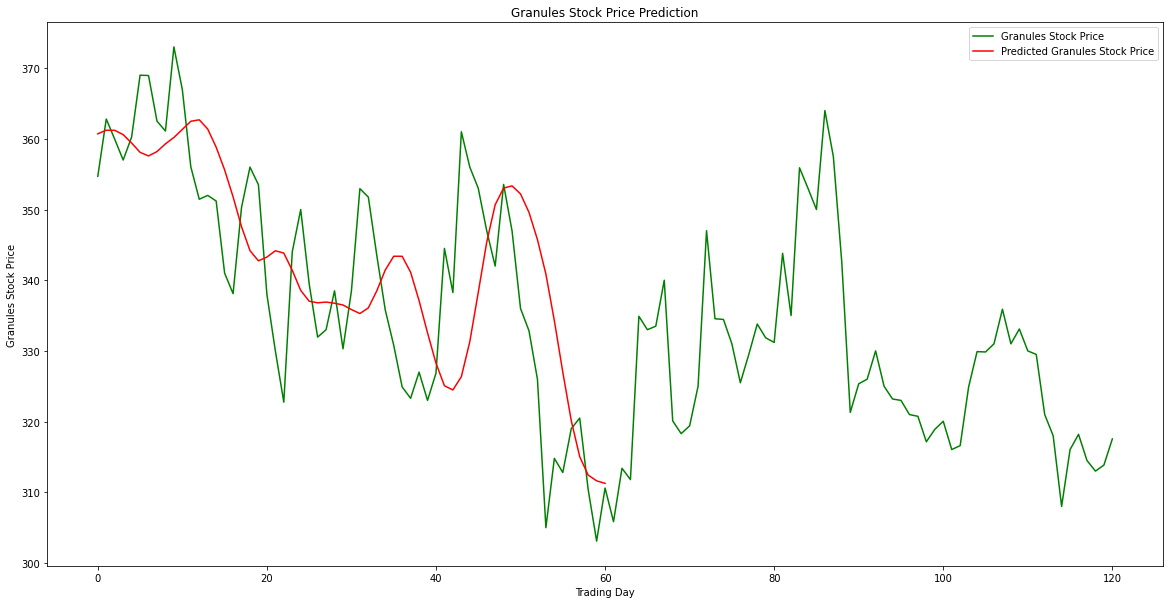

In [73]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Granules Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Granules Stock Price')
plt.title('Granules Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Granules Stock Price')
plt.legend()
plt.show()